# Libraries

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from scipy.cluster.hierarchy import linkage, dendrogram

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

from tabulate import tabulate

# K-means 

In [3]:
mtcars1 = pd.read_csv('http://peter.butka.website.tuke.sk/res/mtcars.csv')

In [4]:
mtcars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
mtcars1.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
hp, drat = mtcars1['hp'], mtcars1['drat']

In [7]:
print(hp.head())
print(drat.head())

0    110
1    110
2     93
3    110
4    175
Name: hp, dtype: int64
0    3.90
1    3.90
2    3.85
3    3.08
4    3.15
Name: drat, dtype: float64


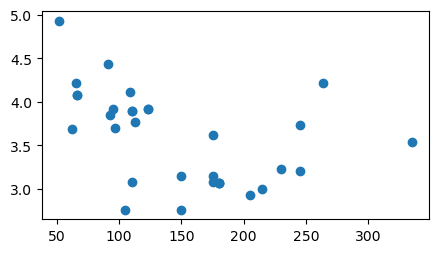

In [8]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout=None)
ax.scatter(hp, drat, facecolor='C0', edgecolor=None)
plt.show()

In [9]:
"""
Pomocou algoritmu k-means rozdeľte dáta mtcars1 do dvoch zhlukov (tried) a uložte
tieto výsledky do premennej s názvom kmeans.results1, zobrazte aj prvky modelu
(napr. centroidy, priradenia k zhlukom, a pod.)
"""
df_hp_drat = pd.concat([hp, drat], axis=1)
kmeans_result1 = KMeans(n_clusters=2).fit(df_hp_drat)

print(f"""Info: \n 
1. Labels: {kmeans_result1.labels_}
2. Centers:\n {kmeans_result1.cluster_centers_}
3. Inertia: {kmeans_result1.inertia_}
4. The number od iteration before the convergence: {kmeans_result1.n_iter_}""")

Info: 
 
1. Labels: [1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1]
2. Centers:
 [[215.69230769   3.30153846]
 [ 99.47368421   3.79842105]]
3. Inertia: 41478.462694736845
4. The number od iteration before the convergence: 3


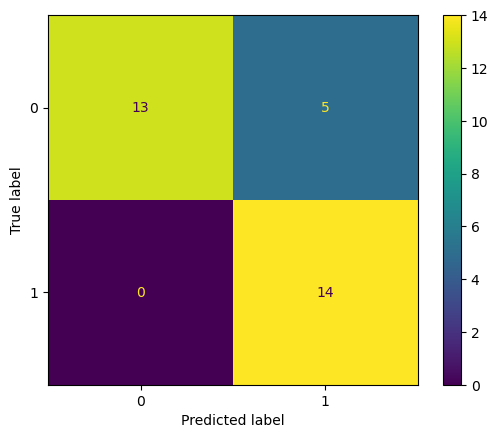

In [10]:
"""
Vytvorte kontingenčnú tabuľku (obdobu confusion matrix), ktorá bude porovnávať
hodnoty atribútu vs z dát mtcars a získané klastre (zhluky) uložené v premennej
kmeans.results1
"""

vs = mtcars1['vs']
cm = confusion_matrix(vs, kmeans_result1.labels_)
cm_display = ConfusionMatrixDisplay(cm).plot()
print(cm_display)

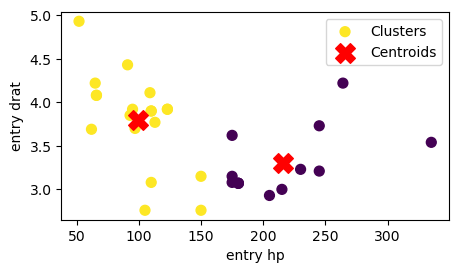

In [11]:
"""
Vytvorte graf, v ktorom budú znázornené atribúty hp a drat a vykreslené body rozdeľte
farebne podľa získaných zhlukov. Doplňte do grafu body centroidov pre jednotlivé zhluky
"""
fig, ax = plt.subplots(figsize=(5, 2.7), layout=None)
ax.scatter(hp, drat, c=kmeans_result1.labels_, cmap='viridis', s=50)
ax.scatter(kmeans_result1.cluster_centers_[:, 0], kmeans_result1.cluster_centers_[:, 1], 
           c='red', 
           marker='X',
           s=200, 
           label='Centroids')
ax.set_xlabel('entry hp')
ax.set_ylabel('entry drat')
ax.legend(['Clusters', 'Centroids'])

# Hierarchical clustering

In [12]:
# Uložte do premennej s názvom mtcars2 všetky riadky dát mtcars a stĺpce mpg a qsec
mtcars2 = pd.concat([mtcars1['mpg'], mtcars1['qsec']], axis=1)
print(mtcars2.head())

    mpg   qsec
0  21.0  16.46
1  21.0  17.02
2  22.8  18.61
3  21.4  19.44
4  18.7  17.02


In [13]:
"""
Do premennej s názvom hc2 uložte výsledky hierarchického zhlukovania z dát
mtcars2, metódu tohto zhlukovania nastavte tak, že algoritmus bude brať vzdialenosť
medzi zhlukmi ako priemer vzdialenosti bodov v jednom zhluku a bodov v inom
zhluku, použitie aglomeratívne zhlukovanie
"""
hc2 = AgglomerativeClustering(n_clusters=2, compute_distances=True, linkage='average').fit(mtcars2)

print(f"""Info: 
Features: {hc2.n_features_in_}
Labels: {hc2.labels_}
Children: \n{hc2.children_}
Number of Clusters: {hc2.n_clusters_}
Distance:\n{hc2.distances_}""")

Info: 
Features: 2
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0]
Children: 
[[14 15]
 [ 4 24]
 [16 22]
 [ 0  1]
 [ 3 20]
 [13 34]
 [28 30]
 [21 37]
 [11 12]
 [ 6 23]
 [31 36]
 [ 9 33]
 [ 5 10]
 [17 19]
 [18 27]
 [ 2 42]
 [39 40]
 [29 35]
 [38 41]
 [43 49]
 [25 26]
 [ 7 47]
 [48 50]
 [44 51]
 [45 46]
 [ 8 53]
 [55 57]
 [32 54]
 [52 56]
 [58 59]
 [60 61]]
Number of Clusters: 2
Distance:
[ 0.16        0.50089919  0.51419841  0.56        0.57870545  0.73288379
  0.80622577  0.88809282  0.92195445  1.08853112  1.12677083  1.31209534
  1.3536617   1.56041661  1.62        1.64602573  1.7622593   1.80807228
  1.99472123  2.15964415  2.55538647  2.84547073  2.87916793  3.36938879
  3.46067028  3.80513996  4.35685689  5.23762348  5.41034779  6.8209154
 12.52988466]


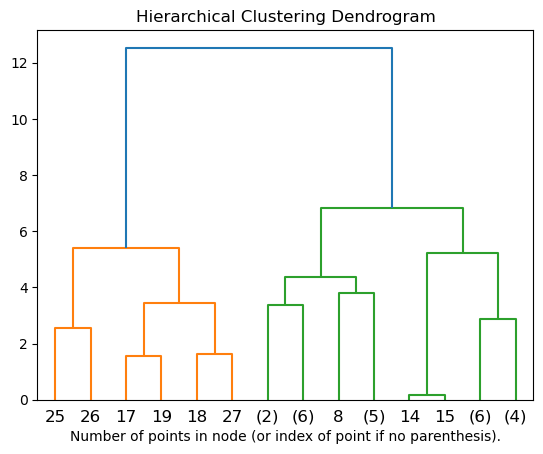

In [14]:
# Vykreslite hierarchické prepájanie zhlukov (klastrov) pomocou dendrogramu
# Orežte vykreslený dendrogram na úroveň troch zhlukov 
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hc2, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [15]:
# Pridajte do dát mtcars nový stĺpec s názvom groups, 
# ktorý bude obsahovať ID získaných zhlukov
mtcars1['groups'] = hc2.labels_

In [16]:
mtcars1.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,groups
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0


# Association rules

In [69]:
AdultUCI = pd.read_csv('http://peter.butka.website.tuke.sk/res/AdultUCI_world.csv')

In [62]:
AdultUCI.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,small
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,small
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,large
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,large
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,large


In [63]:
AdultUCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [65]:
AdultUCI.isna().sum()  # number of nan by columns

age                   0
workclass          2799
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income            16281
dtype: int64

In [70]:
AdultUCI = AdultUCI.dropna()

In [71]:
"""
Z dát AdultUCI vytvorte jej podmnožinu s názvom AdultUCI1, ktorá bude obsahovať
len stĺpce dátového typu faktor (samozrejme skontrolujte všetky typy a podľa potreby
transformujte ak niektoré boli zle načítané, ale je jednoduché ich opraviť na správny
typ)
"""
AdultUCI1 = AdultUCI.select_dtypes(include=['object']).copy()

for col in AdultUCI1.columns:
    AdultUCI1[col] = AdultUCI1[col].astype('category')

In [72]:
AdultUCI1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   workclass       30162 non-null  category
 1   education       30162 non-null  category
 2   marital-status  30162 non-null  category
 3   occupation      30162 non-null  category
 4   relationship    30162 non-null  category
 5   race            30162 non-null  category
 6   sex             30162 non-null  category
 7   native-country  30162 non-null  category
 8   income          30162 non-null  category
dtypes: category(9)
memory usage: 504.8 KB


In [73]:
# Transform into the right format
transactions = AdultUCI1.applymap(str).values

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
AdultUCI2 = pd.DataFrame(te_ary, columns=te.columns_)

In [74]:
AdultUCI2.head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Adm-clerical,Amer-Indian-Eskimo,Armed-Forces,...,United-States,Unmarried,Vietnam,White,Widowed,Wife,Without-pay,Yugoslavia,large,small
0,False,False,False,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [88]:
AdultUCI['income'].unique()

array(['small', 'large'], dtype=object)

In [89]:
"""
Vytvorte premennú rules1, ktorá bude obsahovať asociačné pravidlá získané z týchto
dát pomocou algoritmu apriori, minimálnu dĺžku pravidla nastavte na 4, minimálnu
podporu pravidiel na 0,01, minimálnu spoľahlivosť na 0,68, sledovaný atribút (pravá
strana pravidla) bude obsahovať možnosti atribútu income. 
"""

frequent_itemsets = apriori(AdultUCI2, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())
print(len(frequent_itemsets))

rules: pd.DataFrame = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.68, num_itemsets=None)

# Filtering 
rules1 = rules[(rules['consequents'].apply(lambda x: 'small' in x or 'large' in x)) & 
               (rules['antecedents'].apply(lambda x: len(x) >= 3))]
print(rules1[:10])

    support   itemsets
0  0.027187     (10th)
1  0.034746     (11th)
2  0.012499     (12th)
3  0.018467  (7th-8th)
4  0.015085      (9th)
8174
                         antecedents consequents  antecedent support  \
2010           (Private, Male, 10th)     (small)            0.015317   
2017     (10th, Male, United-States)     (small)            0.017340   
2021             (Male, White, 10th)     (small)            0.016212   
2030  (10th, Private, United-States)     (small)            0.020589   
2037          (Private, White, 10th)     (small)            0.018202   
2042    (10th, White, United-States)     (small)            0.020489   
2051         (Female, Private, 11th)     (small)            0.011140   
2054   (Female, 11th, United-States)     (small)            0.011239   
2063           (Private, Male, 11th)     (small)            0.019263   
2069     (Male, 11th, United-States)     (small)            0.020489   

      consequent support   support  confidence      lift  repres

In [90]:
# Získané pravidlá usporiadajte podľa ukazovateľa Lift a následne ich vypíšte
rules1_sorted = rules1.sort_values('lift', ascending=False)
print(rules1_sorted)

                                             antecedents  \
34133      (Handlers-cleaners, Own-child, United-States)   
34129            (Handlers-cleaners, Private, Own-child)   
34122  (Handlers-cleaners, Private, Own-child, United...   
26190            (Handlers-cleaners, Private, Own-child)   
26208      (Handlers-cleaners, Own-child, United-States)   
...                                                  ...   
13699       (Married-civ-spouse, Male, HS-grad, Husband)   
25501  (Married-civ-spouse, Private, Male, White, HS-...   
10917    (Married-civ-spouse, Male, Craft-repair, White)   
3526           (Craft-repair, Married-civ-spouse, White)   
18247  (Married-civ-spouse, Private, Transport-moving...   

                                       consequents  antecedent support  \
34133        (Private, Male, Never-married, small)            0.013162   
34129  (Male, Never-married, United-States, small)            0.013195   
34122                 (Male, Never-married, small)       

In [97]:
def remove_redundant_rules(rules):
    # Convert the rules to lists for quick access
    rules_list = rules.to_dict('records')
    non_redundant = []

    # Sort the Lift Rules to check the more "strong" rules first
    sorted_rules = sorted(rules_list, key=lambda x: x['lift'], reverse=True)

    # Check each rule
    for i, rule in enumerate(sorted_rules):
        antecedents = set(rule['antecedents'])
        consequents = rule['consequents']
        is_redundant = False

        # Check the current rules against the remaining
        for j in range(i + 1, len(sorted_rules)):
            other_rule = sorted_rules[j]
            other_antecedents = set(other_rule['antecedents'])

            # If the current rule is a subset of another
            if antecedents.issubset(other_antecedents) and consequents == other_rule['consequents']:
                is_redundant = True
                break

        if not is_redundant:
            non_redundant.append(rule)

    # return DataFrame
    return pd.DataFrame(non_redundant)

not_redundant_rules = remove_redundant_rules(rules1_sorted)

table_data = []
for _, rule in not_redundant_rules.head(20).iterrows():
    table_data.append([
        ", ".join(rule['antecedents']),  # Преобразуем frozenset в строку
        ", ".join(rule['consequents']),
        f"{rule['support']:.4f}",
        f"{rule['confidence']:.2f}",
        f"{rule['lift']:.2f}"
    ])
    
headers = ["Antecedents", "Consequents", "Support", "Confidence", "Lift"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+------------------------------------------------------------------------------+-------------------------------------------------------+-----------+--------------+--------+
| Antecedents                                                                  | Consequents                                           |   Support |   Confidence |   Lift |
+==============================================================================+=======================================================+===========+==============+========+
| Handlers-cleaners, Own-child, United-States                                  | Private, Male, Never-married, small                   |    0.0103 |         0.79 |   5.59 |
+------------------------------------------------------------------------------+-------------------------------------------------------+-----------+--------------+--------+
| Handlers-cleaners, Private, Own-child                                        | Male, Never-married, United-States, small             